## Imports

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Set a nice plotting style and enable inline plots
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

In [7]:
# Load the California housing dataset from scikit-learn
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

# Display dataset keys and feature/target names
print("Dataset keys:", california.keys())
print("Feature names:", california.feature_names)
print("Target names:", california.target_names)

Dataset keys: dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target names: ['MedHouseVal']


In [8]:
# Create a DataFrame for a quick look at the dataset
df_california = pd.DataFrame(data=california.data, columns=california.feature_names)
df_california['target'] = california.target 
print("\nFirst five rows of the dataset:")
df_california.head()


First five rows of the dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
# We split the dataset into training and testing sets.
# Although this dataset is already preprocessed, many real-world scenarios require additional cleaning steps.
# Here, we simply perform an 80/20 train-test split.

# Define features (X) and target (y)
X = california.data
y = california.target

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 16512 samples
Testing set size: 4128 samples


In [12]:
# create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Intercept: {model.intercept_:.4f}")
print(f'Mean squared error: {mse:.2f}')
print(f'R² score: {r2:.2f}')

# Optional: Display feature coefficients
coef_df = pd.DataFrame({'Feature': california.feature_names, 'Coefficient': model.coef_})
print("\nFeature Coefficients:")
print(coef_df)

Model Intercept: -37.0233
Mean squared error: 0.56
R² score: 0.58

Feature Coefficients:
      Feature  Coefficient
0      MedInc     0.448675
1    HouseAge     0.009724
2    AveRooms    -0.123323
3   AveBedrms     0.783145
4  Population    -0.000002
5    AveOccup    -0.003526
6    Latitude    -0.419792
7   Longitude    -0.433708


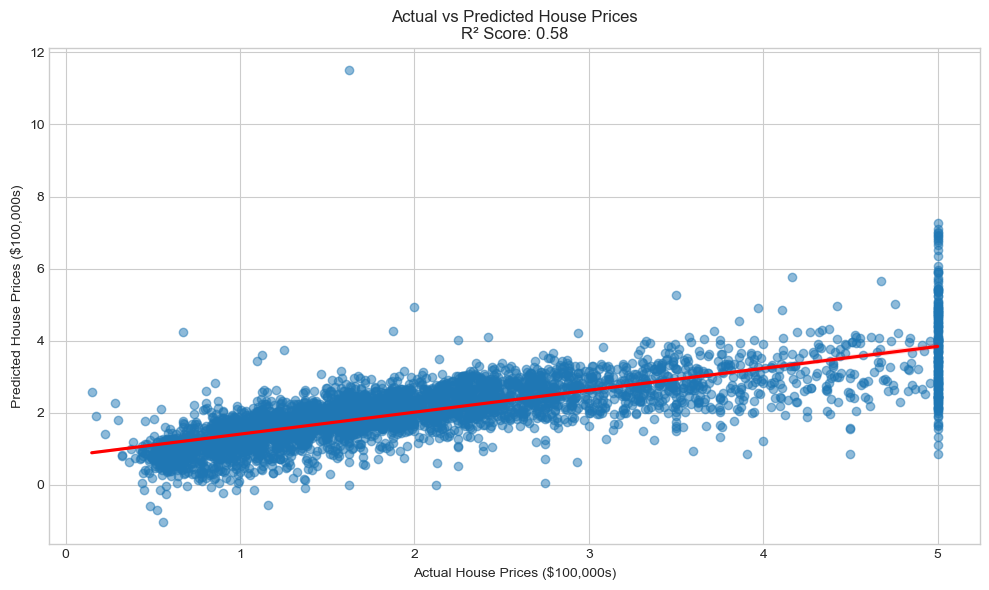

In [15]:
import seaborn as sns

# Create DataFrame for seaborn
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Create the plot
plt.figure(figsize=(10, 6))
sns.regplot(data=results_df, x='Actual', y='Predicted', 
            scatter_kws={'alpha':0.5},
            line_kws={'color': 'red'})

plt.title('Actual vs Predicted House Prices\nR² Score: {:.2f}'.format(r2))
plt.xlabel('Actual House Prices ($100,000s)')
plt.ylabel('Predicted House Prices ($100,000s)')

plt.tight_layout()
plt.show()